In [14]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import os

In [15]:
file_path = "layoffs - Copy.csv"
df = pd.read_csv(file_path)
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,Post-IPO,United States,409.0
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,Series C,India,120.0
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Post-IPO,Canada,NaN
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Seed,Germany,NaN
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,Unknown,India,382.0


In [16]:
# change our date dtype to datetime

df['date']= pd.to_datetime(df['date'])
print(df.dtypes)

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
dtype: object


In [17]:
# check our df with describe

df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1696.000000,1643.000000,2238.000000
mean,253.722877,0.258690,822.903617
std,831.980185,0.256341,5516.727952
min,3.000000,0.000000,0.000000
25%,37.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,445.000000
max,12000.000000,1.000000,121900.000000


In [18]:
# dropping two columns stage and funds_raised

df= df.drop(['stage', 'funds_raised'], axis=1)

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India


In [19]:
# dropping nan's 

df= df.dropna()

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India


In [22]:
# create column that gives a value of 0 or `1 1= mass layoff and 0= not technically a mass layoff

df['mass_layoff'] = np.where(df['total_laid_off'] > 49, 1, 0)

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1


In [23]:
# create csv for all our data March 2020 until April 2023

df.to_csv("full_data_set.csv", encoding="utf-8", index = False)

In [24]:
# checking if we hve any duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2465    False
2466    False
2468    False
2469    False
2470    False
Length: 1245, dtype: bool

In [27]:
# plotting our features

df['percentage_laid_off'].value_counts()

0.100    114
0.200    106
0.150     71
0.250     71
0.050     62
        ... 
0.125      1
0.115      1
0.570      1
0.650      1
0.980      1
Name: percentage_laid_off, Length: 74, dtype: int64

<AxesSubplot:>

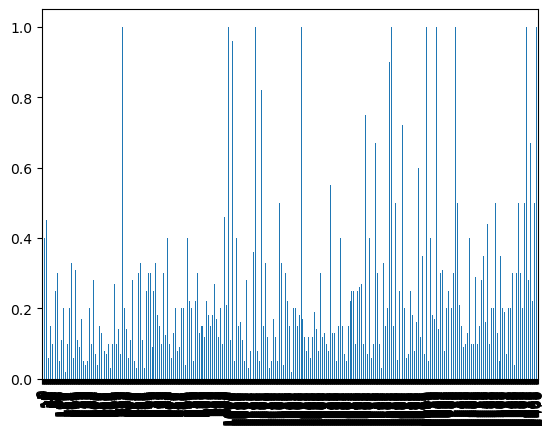

In [29]:
# 

df['percentage_laid_off'].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

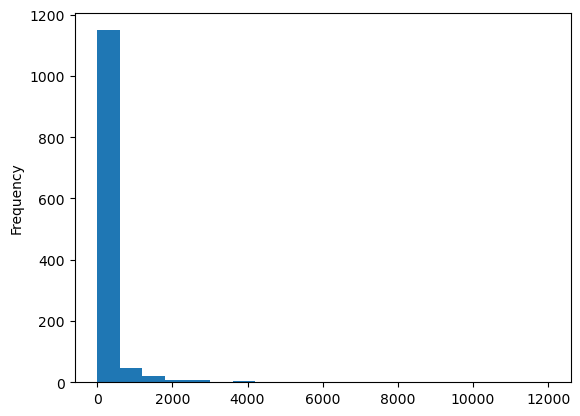

In [31]:
# trying a histogram

df['total_laid_off'].plot(kind='hist', bins=20)

In [32]:
# compare maybe different features

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1


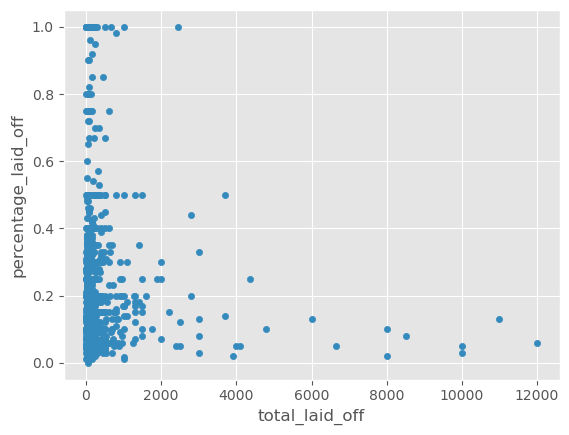

In [35]:
#compare % laid off vs total laid off

df.plot(kind='scatter', x= 'total_laid_off', 
        y= 'percentage_laid_off')
plt.show()

In [34]:
# adding seaborn to analyze data

import seaborn as sns
plt.style.use('ggplot')


<AxesSubplot:xlabel='total_laid_off', ylabel='percentage_laid_off'>

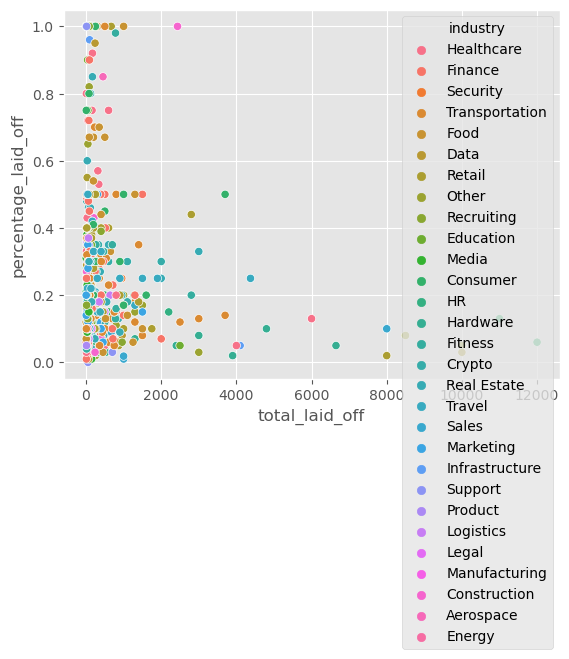

In [38]:
sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='industry',
               data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

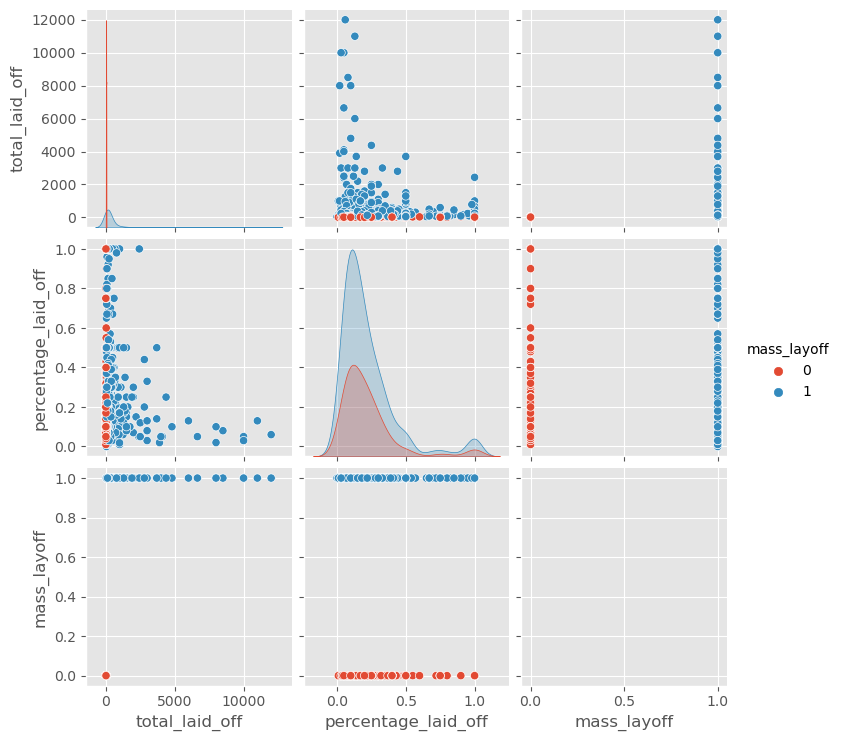

In [41]:
# using pairplot to look at multiple data

sns.pairplot(df, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'mass_layoff')
plt.show

In [46]:
# corrolation 

df_corr= df[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

<AxesSubplot:>

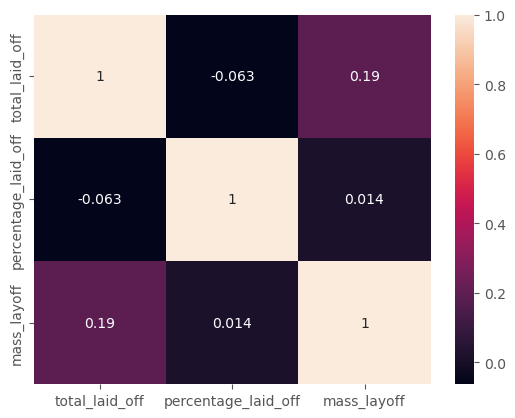

In [48]:
# heatmap
sns.heatmap(df_corr, annot=True)

In [11]:
# recreate qtr one again

qtr1_df= df2[(df['date']>"2021-12-31")&(df['date']<"2022-03-31")]

qtr1_df.head()

C:\Users\gskil\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,ID
1761,Sea,Bengaluru,Retail,350.0,NaN,2022-03-30,Post-IPO,India,8600.0,1761
1762,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Series B,Germany,40.0,1762
1763,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,Series H,United States,3400.0,1763
1764,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Post-IPO,Canada,22.0,1764
1765,Furlenco,Bengaluru,Retail,180.0,NaN,2022-03-26,Series D,India,228.0,1765


In [12]:
# dropping nan's 

qtr1_df_clean= qtr1_df.dropna()

qtr1_df_clean.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,ID
1762,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Series B,Germany,40.0,1762
1763,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,Series H,United States,3400.0,1763
1764,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Post-IPO,Canada,22.0,1764
1767,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Post-IPO,Sweden,275.0,1767
1769,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,Series B,India,62.0,1769


In [13]:
# count our items

qtr1_df_clean.count()

company                18
location               18
industry               18
total_laid_off         18
percentage_laid_off    18
date                   18
stage                  18
country                18
funds_raised           18
ID                     18
dtype: int64